In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.stats import norm

In [3]:
data_df = pd.read_csv('housing_price_dataset.csv')

In [4]:
data_df.head()

train_data = data_df.copy()
train_data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [5]:
data_df.shape

(50000, 6)

In [6]:
data_df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [7]:
data_df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [8]:
data_df['Price'].describe()

count     50000.000000
mean     224827.325151
std       76141.842966
min      -36588.165397
25%      169955.860225
50%      225052.141166
75%      279373.630052
max      492195.259972
Name: Price, dtype: float64

In [9]:
price = data_df['Price']

In [10]:
price.mean()

224827.32515099045

In [11]:
price.median()

225052.14116600397

In [12]:
price.std()

76141.84296604691

In [13]:
price.var()

5797580250.266148

In [14]:
five_number_summary = np.quantile(price, [0, 0.25, 0.5, 0.75, 1])

In [15]:
min = five_number_summary[0]
min

-36588.16539749279

In [16]:
q1 = five_number_summary[1]
q1

169955.8602251014

In [17]:
q2 = five_number_summary[2]
q2

225052.14116600397

In [18]:
q3 = five_number_summary[3]
q3

279373.6300523317

In [19]:
iqr = q3 - q1
iqr

109417.76982723031

In [20]:
lower_bound = q1 - 1.5 * iqr
lower_bound

5829.205484255945

In [21]:
uppper_bound = q3 + 1.5 * iqr
uppper_bound

443500.28479317715

In [22]:
outliers = data_df[((data_df['Price']<lower_bound) | (data_df['Price']>uppper_bound))]


In [23]:
outliers['Price']

1266     -24715.242482
2310      -7550.504574
2845     461502.014630
3285     456959.804367
3357     457902.675442
3630     -19871.251146
3784     470989.679074
3967     453551.125469
4162     -10608.359522
4537       5796.058628
5118     -23911.003119
5951      -4537.418615
6355     -13803.684059
7276     452870.618989
7430     492195.259972
8687     444972.111219
8720     -24183.000515
9611     -13692.026068
10597      -434.097124
11322    468470.378004
11330    446341.362223
11991     -4910.415323
12055    451173.373568
16821    449315.843749
17216       276.063516
17442     -8238.884499
17706    -28774.998022
20211    -18159.685676
20759     -4810.724320
21815    468493.877841
23600    447752.277841
23650     -4295.932176
23662      3000.859614
25017    462557.562958
25459     -7177.628532
26930    476671.733263
26973    467492.827823
27300      3926.857020
29044    445343.409387
29827      -847.895073
29980      2697.849758
30171      -602.209099
30955    449584.857256
32168    44

In [24]:
outliers['Price'].shape

(59,)

In [25]:
data_df['Neighborhood'] = data_df['Neighborhood'].map({'Suburb': 1, 'Rural': 2, 'Urban': 3})

In [26]:
data_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,2,1969,215355.283618
1,2459,3,2,2,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,3,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,2,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,2,1984,380512.685957


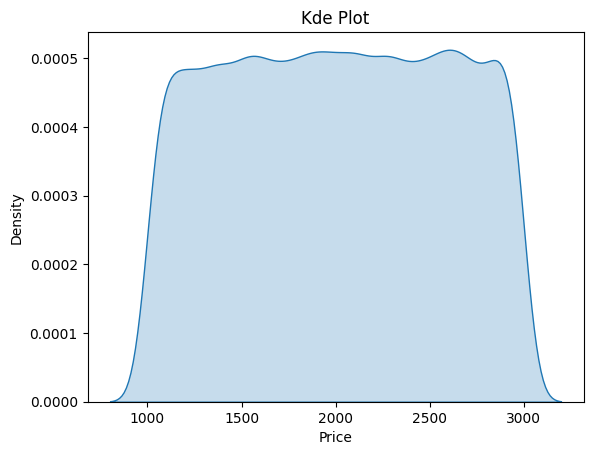

In [27]:
sns.kdeplot(data=data_df['SquareFeet'], fill=True)
plt.title("Kde Plot")
plt.xlabel("Price")
plt.show()

In [28]:
mu, std = norm.fit(data_df['Price'])

In [29]:
pri = np.sort(data_df['Price'])

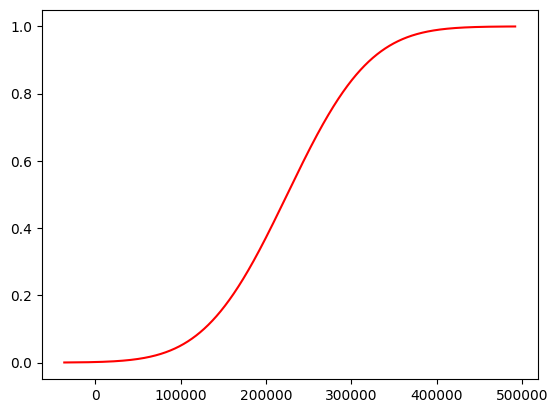

In [30]:
plt.plot(pri, st.norm.cdf(pri, mu, std), color='red')
plt.show()


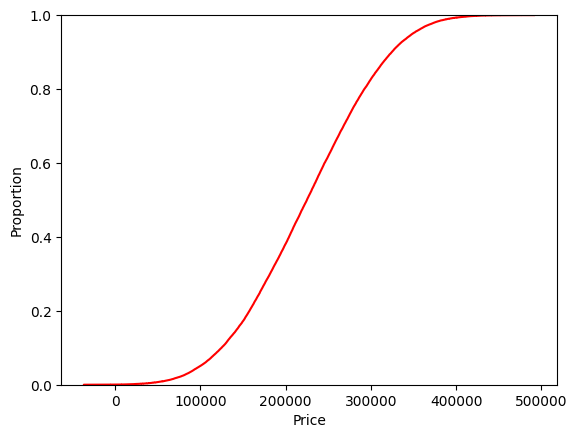

In [31]:
sns.ecdfplot(data_df['Price'], color='red')
plt.show()


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num = data_df.select_dtypes(['number']).columns
# num = num.drop(['Price'])
data_df[num] = scaler.fit_transform(data_df[num])

In [33]:
data_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.563282,0.666667,0.0,0.5,0.267606,0.476459
1,0.729865,0.333333,0.5,0.5,0.422535,0.437991
2,0.430215,0.000000,0.0,0.0,0.281690,0.649565
3,0.647324,0.000000,0.0,1.0,0.647887,0.460255
4,0.565283,1.000000,0.5,0.0,0.718310,0.584406
...,...,...,...,...,...,...
49995,0.141071,1.000000,1.0,0.5,0.352113,0.258459
49996,0.927464,0.000000,0.5,0.0,0.535211,0.777437
49997,0.989995,1.000000,1.0,0.0,0.169014,0.795597
49998,0.798399,1.000000,0.5,0.5,0.478873,0.788793


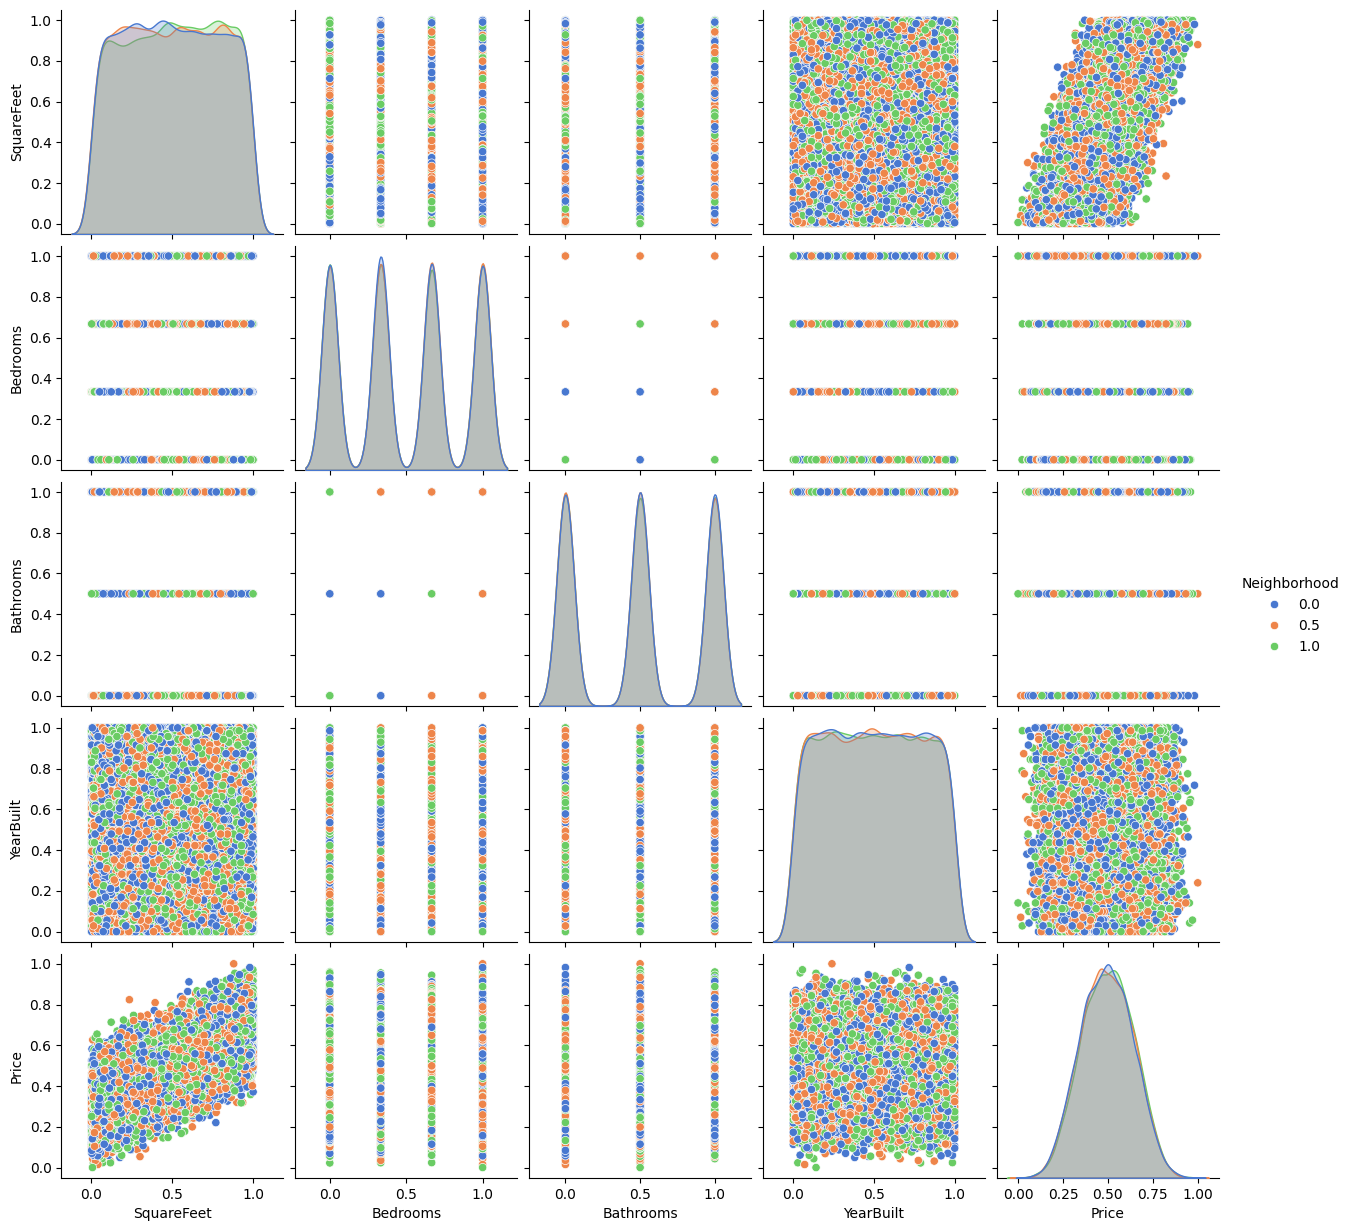

In [46]:
sns.pairplot(data_df, hue='Neighborhood', diag_kind="kde", palette='muted')
plt.show()

In [ ]:
sns.histplot(data_df['SquareFeet'])
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

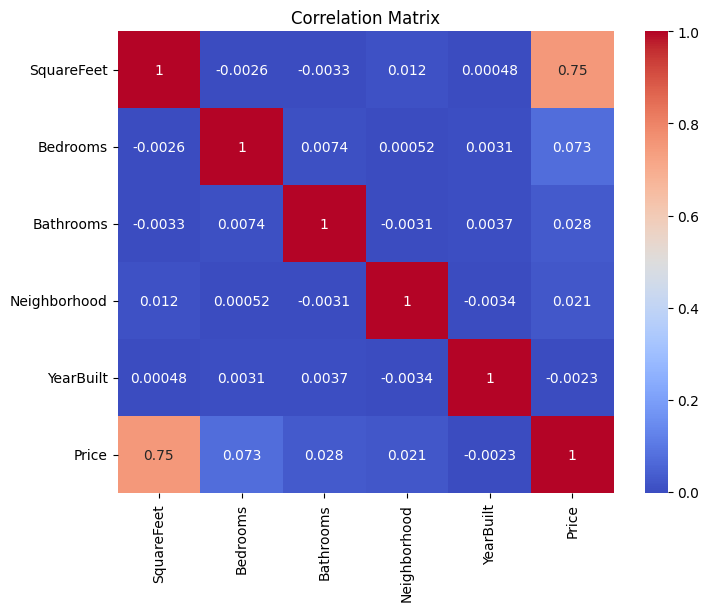

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Price', ylabel='SquareFeet'>

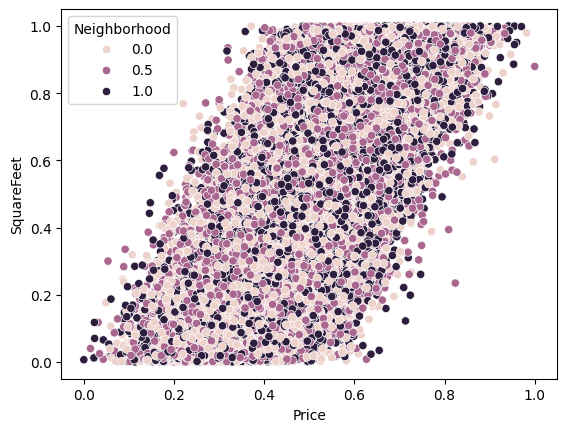

In [36]:
sns.scatterplot(data_df, x='Price', y='SquareFeet', hue='Neighborhood')

<Axes: >

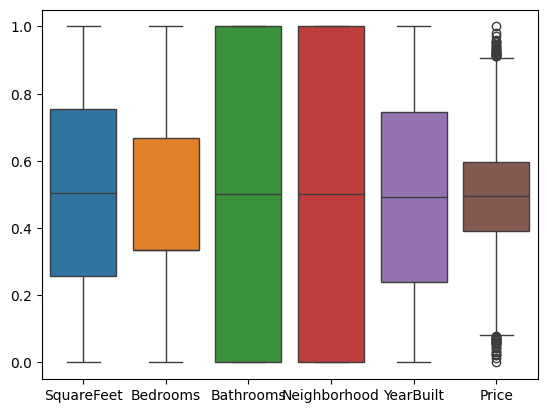

In [37]:
sns.boxplot(data_df)

In [38]:
data_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.563282,0.666667,0.0,0.5,0.267606,0.476459
1,0.729865,0.333333,0.5,0.5,0.422535,0.437991
2,0.430215,0.000000,0.0,0.0,0.281690,0.649565
3,0.647324,0.000000,0.0,1.0,0.647887,0.460255
4,0.565283,1.000000,0.5,0.0,0.718310,0.584406
...,...,...,...,...,...,...
49995,0.141071,1.000000,1.0,0.5,0.352113,0.258459
49996,0.927464,0.000000,0.5,0.0,0.535211,0.777437
49997,0.989995,1.000000,1.0,0.0,0.169014,0.795597
49998,0.798399,1.000000,0.5,0.5,0.478873,0.788793


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

# X = data_df.drop(columns='Price')
X = data_df[['SquareFeet']]
y = data_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 1

poly = PolynomialFeatures(degree= degree, include_bias=False)
model = LinearRegression()

X_poly = poly.fit_transform(X_train)
model.fit(X_poly, y_train)

LinearRegression()

In [40]:
y_test.shape

(10000,)

In [41]:
coef = model.coef_
intercept = model.intercept_

count = 0

feature_names = poly.get_feature_names_out(X_train.columns)
print(feature_names)

equation = f"y_train = {intercept:.4f}"

for i, coef in enumerate(coef):
    equation += f" + {coef:.4f} * {feature_names[i]}"
    count += 1

print(f"Degree {degree} Polynomial Regression model:\n {equation}")

print("No. of coefficent: ", count)

['SquareFeet']
Degree 1 Polynomial Regression model:
 y_train = 0.3053 + 0.3756 * SquareFeet
No. of coefficent:  1


In [42]:
from sklearn.metrics import accuracy_score, f1_score, root_mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

X_test_poly = poly.fit_transform(X_test)

y_pred = model.predict(X_test_poly)

print(y_pred)

rmse = root_mean_squared_error(y_pred, y_test)
rae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)



[0.47327714 0.30550301 0.54279161 ... 0.65946321 0.4319442  0.53621592]


In [43]:
y_pred

array([0.47327714, 0.30550301, 0.54279161, ..., 0.65946321, 0.4319442 ,
       0.53621592])

In [44]:
print(f"Mean Square error: {rmse:.2f}")
print(f"Mean Absolute Error: {rae:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Square error: 0.09
Mean Absolute Error: 0.08
R2 Score: 0.25


In [45]:
# Generate confusion matrix for testing data
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

ValueError: continuous is not supported

In [ ]:
y_pred

array([0.47327714, 0.30550301, 0.54279161, ..., 0.65946321, 0.4319442 ,
       0.53621592])

In [ ]:
y_test

33553    0.392265
9427     0.309203
199      0.535569
12447    0.531103
39489    0.581932
           ...   
28567    0.446031
25079    0.526601
18707    0.735220
15200    0.532201
5857     0.535381
Name: Price, Length: 10000, dtype: float64